EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('./data/online_retail_customer_churn.csv').drop(columns=['Customer_ID'])
df

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   object 
 2   Annual_Income               1000 non-null   float64
 3   Total_Spend                 1000 non-null   float64
 4   Years_as_Customer           1000 non-null   int64  
 5   Num_of_Purchases            1000 non-null   int64  
 6   Average_Transaction_Amount  1000 non-null   float64
 7   Num_of_Returns              1000 non-null   int64  
 8   Num_of_Support_Contacts     1000 non-null   int64  
 9   Satisfaction_Score          1000 non-null   int64  
 10  Last_Purchase_Days_Ago      1000 non-null   int64  
 11  Email_Opt_In                1000 non-null   bool   
 12  Promotion_Response          1000 non-null   object 
 13  Target_Churn                1000 n

In [4]:
df.describe()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [5]:
df['Target_Churn'].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

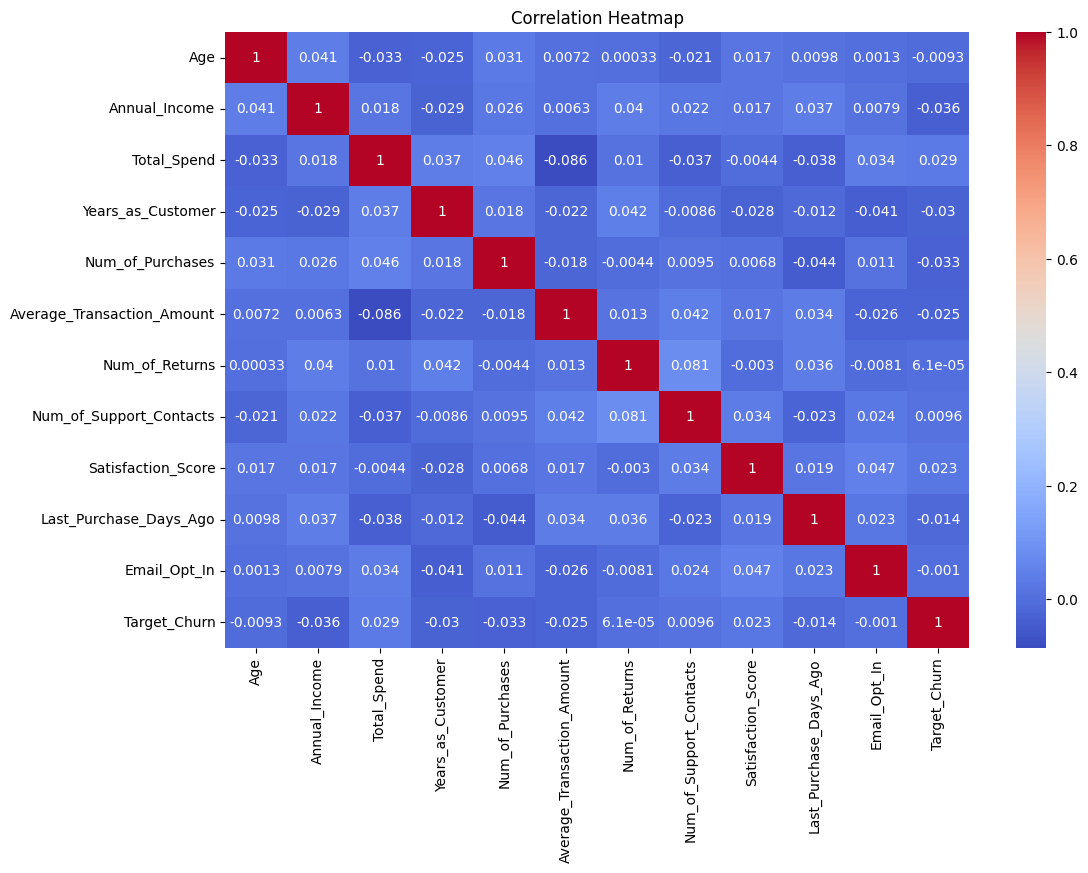

In [7]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 수치형 변수 분포 확인
# 상관계수 전부 |r| < 0.5 -> 상관관계 없음, 비선형 관계, drop 안해도 될 듯?


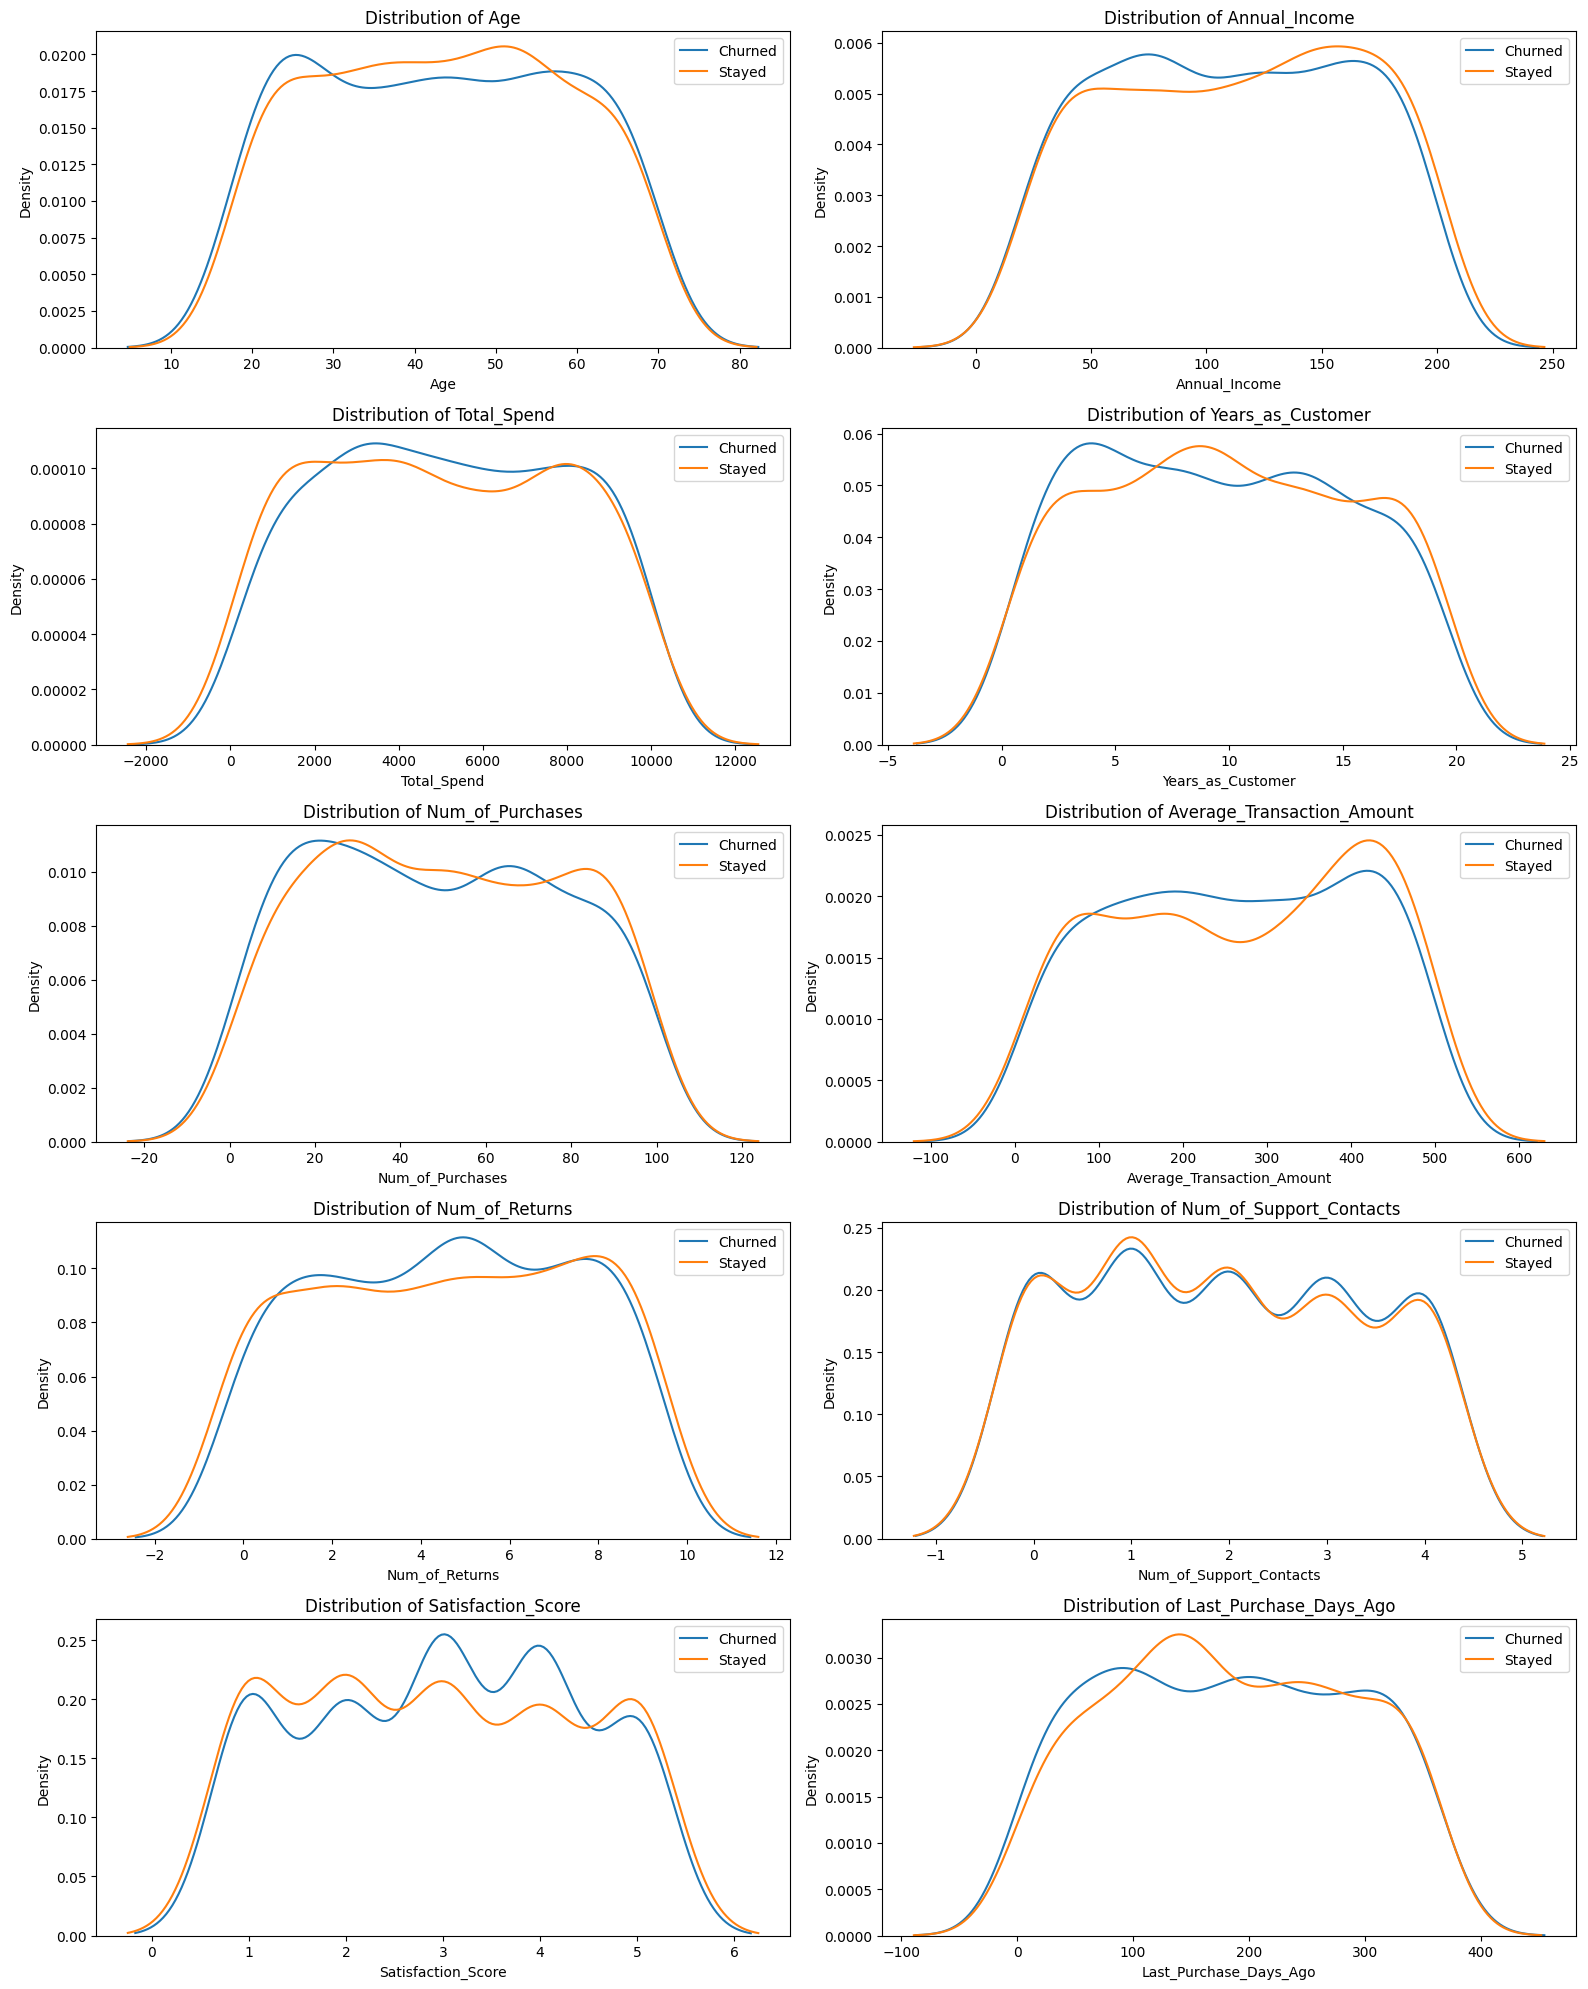

In [8]:
# 수치형 변수 중 이탈 여부별 분포 시각화
# 수치형 컬럼 리스트 (식별자 및 타겟 제외)
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# subplot 배치 설정
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(16, 4 * n_rows))

# 각 수치형 컬럼에 대해 이탈 여부별 분포 시각화
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # 이탈 여부별 KDE plot
    for churned, label in zip([True, False], ["Churned", "Stayed"]):
        subset = df[df["Target_Churn"] == churned]
        sns.kdeplot(subset[col], label=label)
    
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()


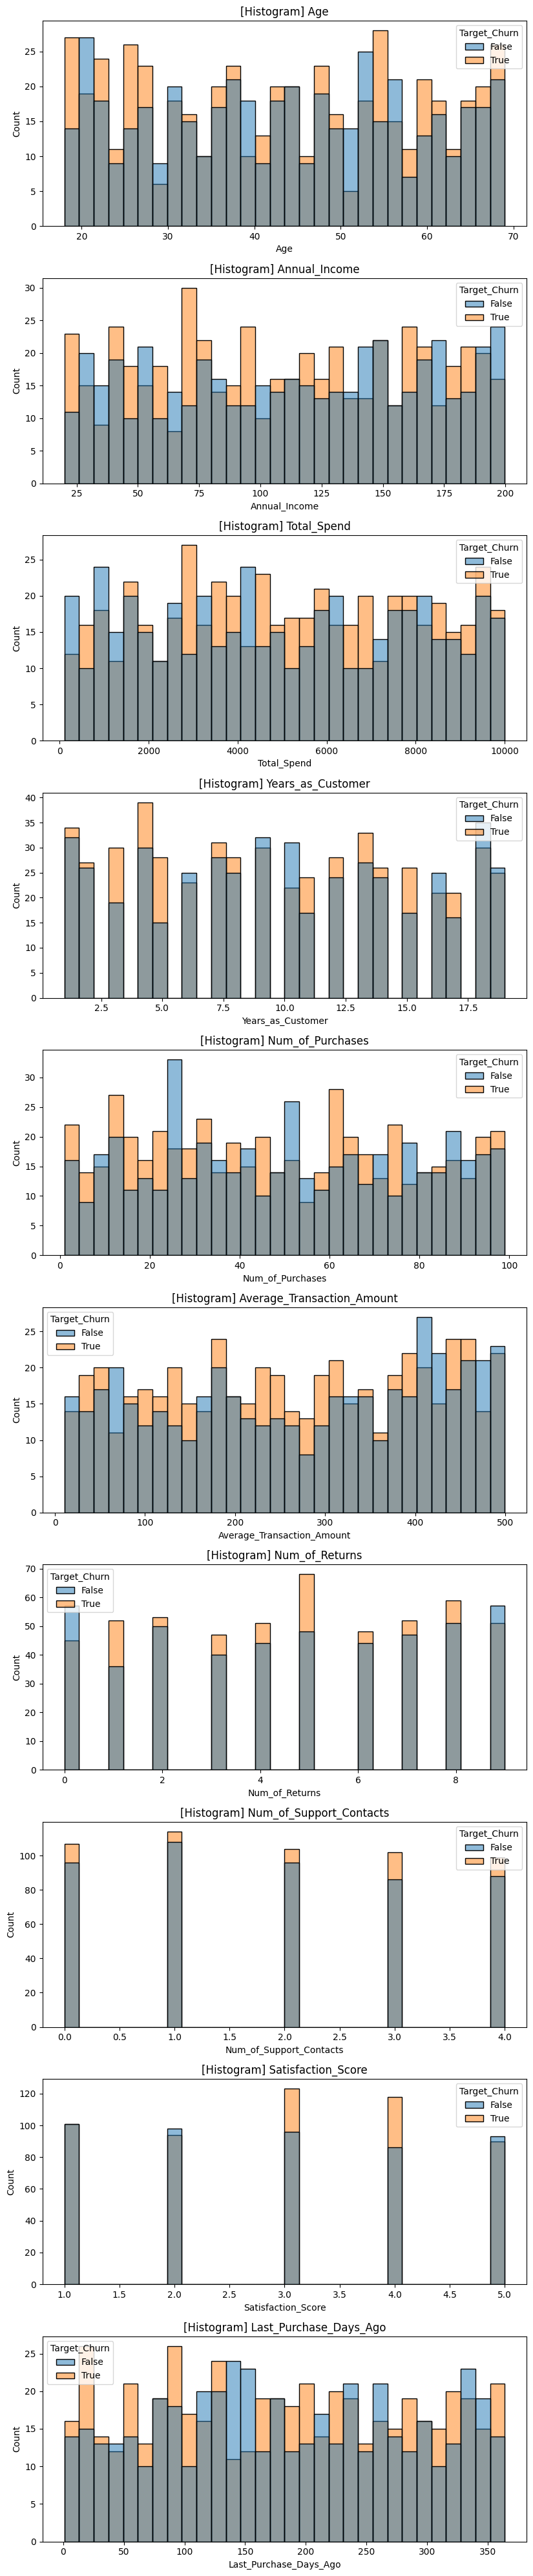

In [9]:
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# 1. 히스토그램 (이탈 여부 별도 색상)
def plot_histograms():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.histplot(data=df, x=col, hue="Target_Churn", kde=False, bins=30)
        plt.title(f"[Histogram] {col}")
    plt.tight_layout()
    plt.show()

# 2. 박스플롯 (이탈 여부별 비교)
def plot_boxplots():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.boxplot(x="Target_Churn", y=col, data=df)
        plt.title(f"[Boxplot] {col}")
    plt.tight_layout()
    plt.show()

# 3. 바이올린 플롯
def plot_violinplots():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.violinplot(x="Target_Churn", y=col, data=df, inner="box")
        plt.title(f"[Violinplot] {col}")
    plt.tight_layout()
    plt.show()

# 원하는 시각화 함수 호출
plot_histograms()
# plot_boxplots()
# plot_violinplots()


In [10]:
import pandas as pd

#### 이상치 확인 ####

# 수치형 컬럼 리스트 정의
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# 이상치 계산 결과 저장 리스트
detailed_outlier_info = []

# 각 컬럼별로 이상치 계산
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    detailed_outlier_info.append({
        "Column": col,
        "Q1": round(q1, 3),
        "Q3": round(q3, 3),
        "IQR": round(iqr, 3),
        "Lower Bound": round(lower_bound, 3),
        "Upper Bound": round(upper_bound, 3),
        "Outlier Count": len(outliers)
    })

# 결과를 데이터프레임으로 보기 좋게 출력
outlier_df = pd.DataFrame(detailed_outlier_info)
print(outlier_df.to_string(index=False))



                    Column       Q1       Q3      IQR  Lower Bound  Upper Bound  Outlier Count
                       Age   30.000   56.000   26.000       -9.000       95.000              0
             Annual_Income   67.800  158.452   90.652      -68.179      294.431              0
               Total_Spend 2678.675 7606.470 4927.795    -4713.018    14998.162              0
         Years_as_Customer    5.000   14.000    9.000       -8.500       27.500              0
          Num_of_Purchases   25.000   74.000   49.000      -48.500      147.500              0
Average_Transaction_Amount  139.682  401.602  261.920     -253.197      794.482              0
            Num_of_Returns    2.000    7.000    5.000       -5.500       14.500              0
   Num_of_Support_Contacts    1.000    3.000    2.000       -2.000        6.000              0
        Satisfaction_Score    2.000    4.000    2.000       -1.000        7.000              0
    Last_Purchase_Days_Ago   93.000  274.000  181.

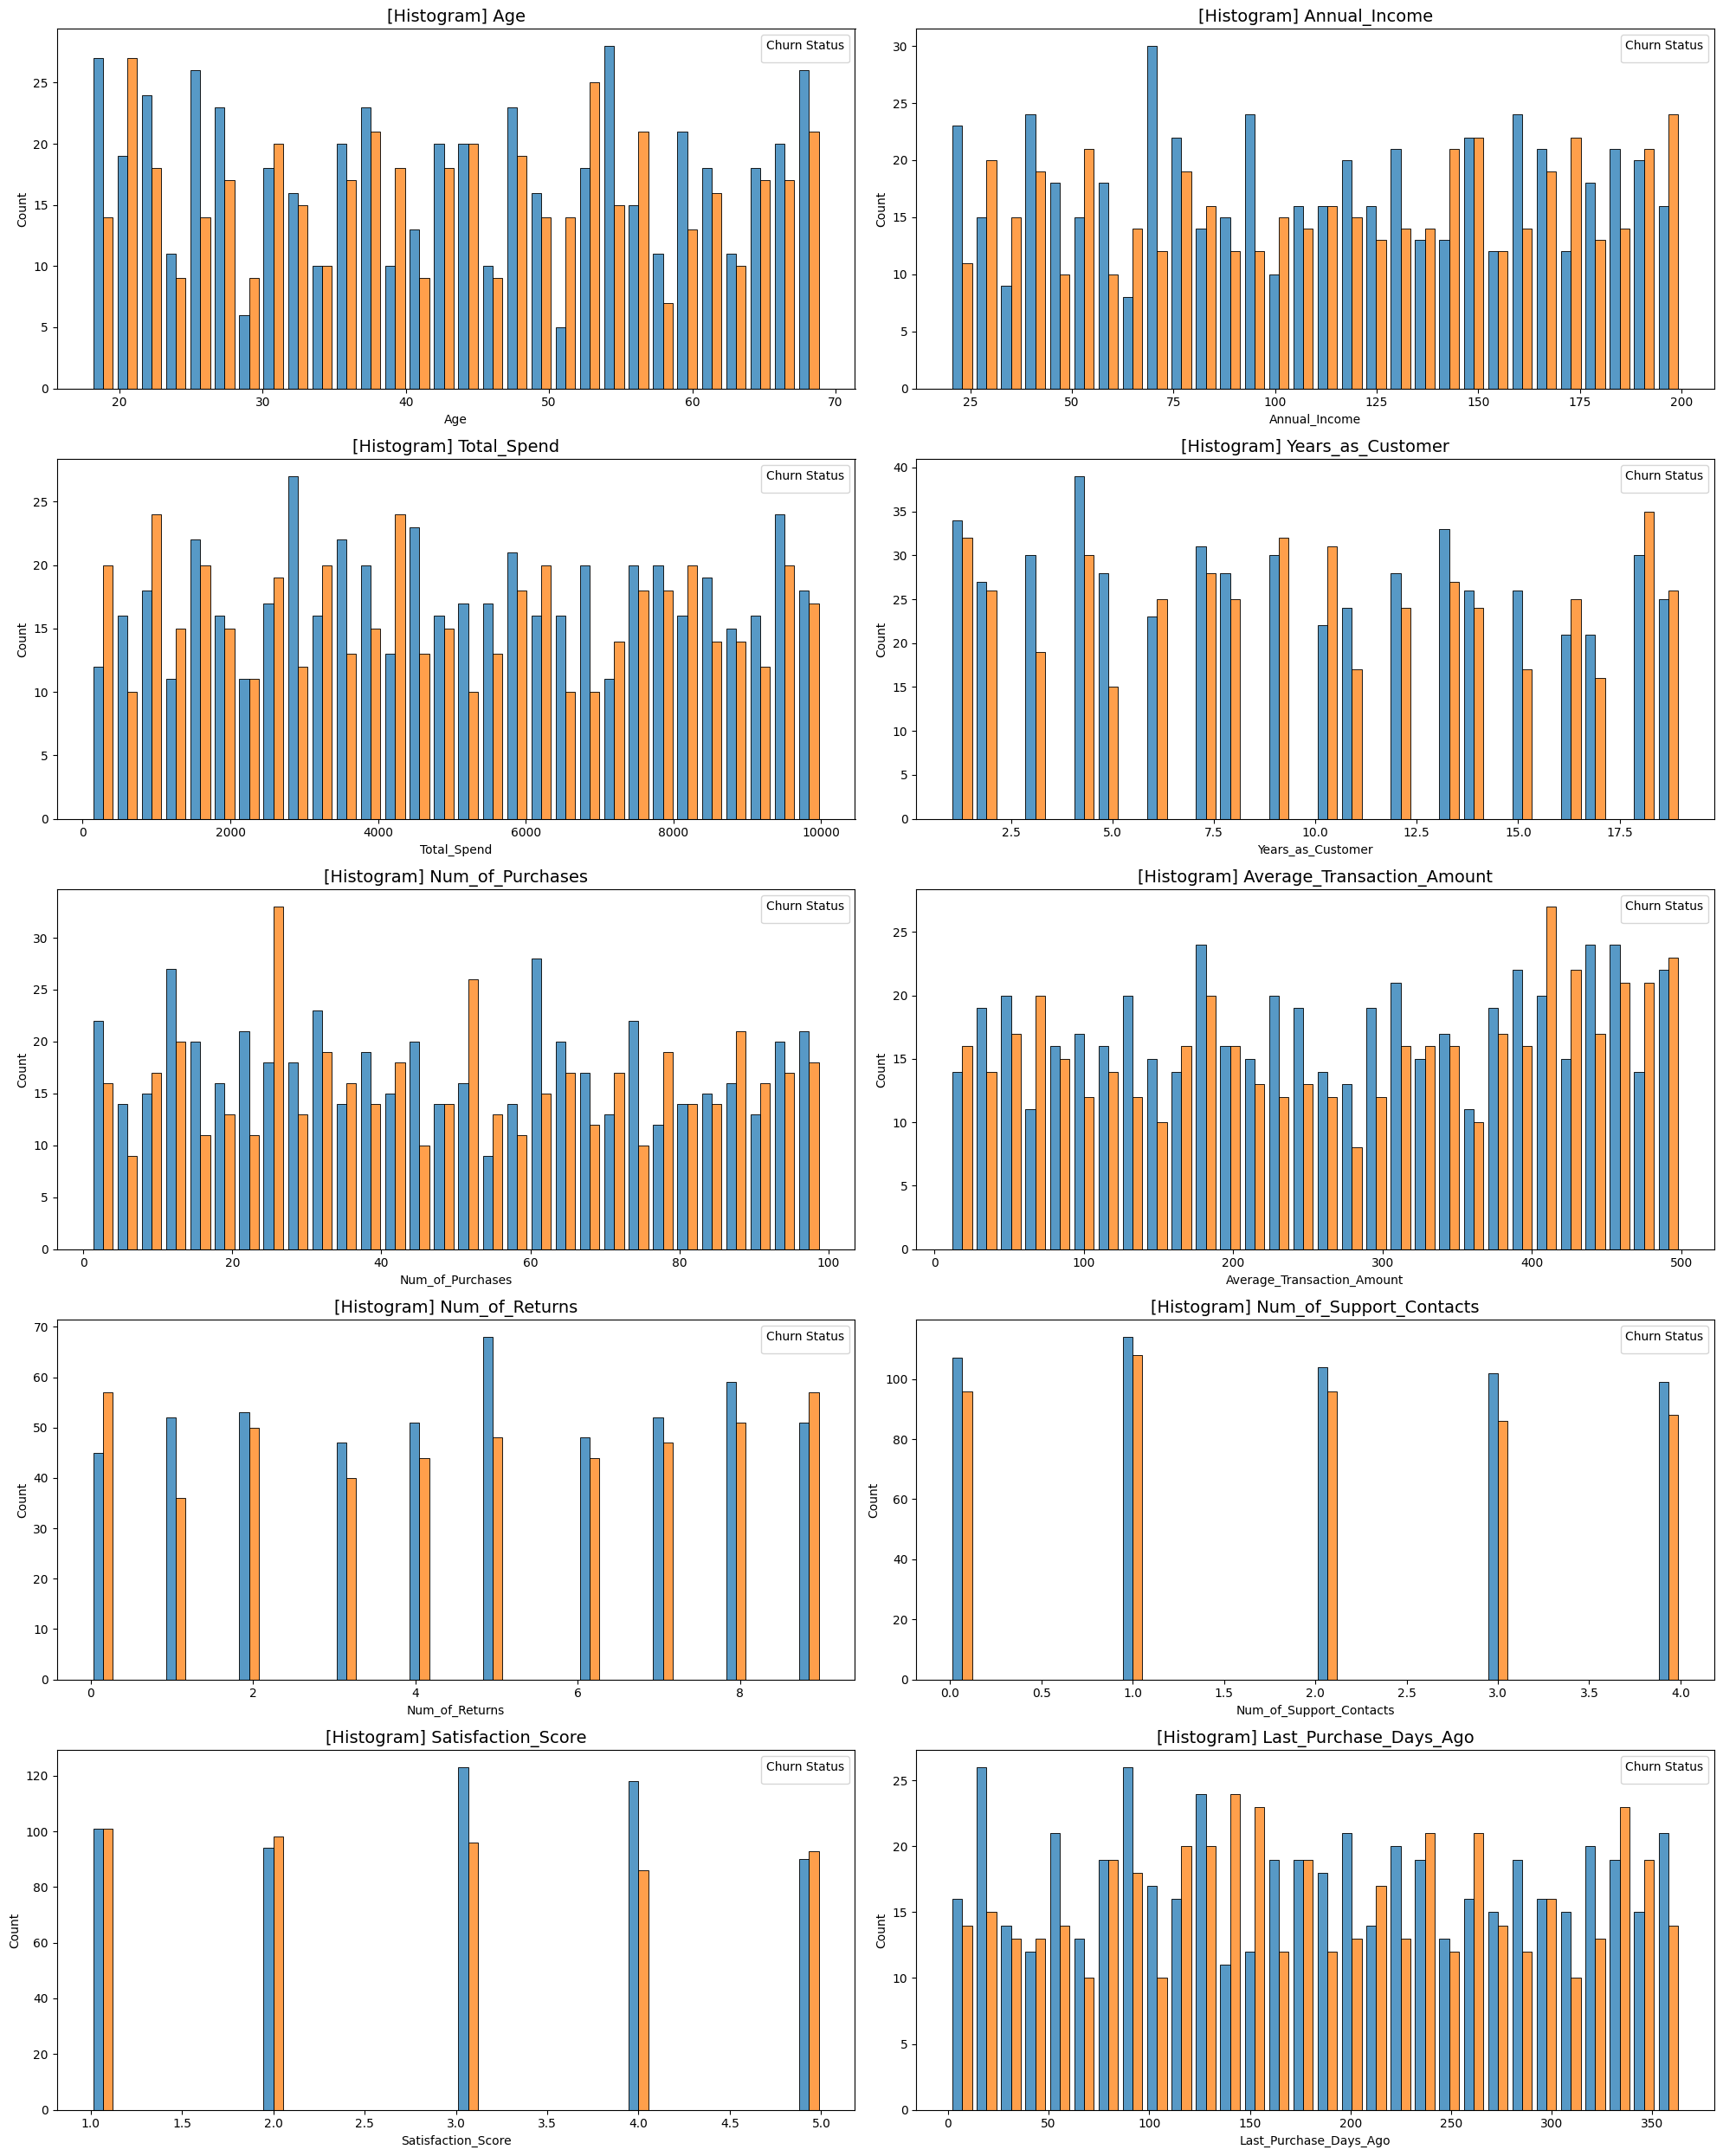

In [11]:
# 수치형 변수 목록
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# 이탈 여부를 문자열 라벨로 변환 (시각화에 더 적합)
df["Churn_Status"] = df["Target_Churn"].map({True: "Churned", False: "Stayed"})

# 서브플롯 설정
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(20, 5 * n_rows))  # 크기 크게 설정

# 각 변수에 대해 히스토그램 그리기
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(
        data=df,
        x=col,
        hue="Churn_Status",
        bins=30,
        multiple="dodge",    # 겹치지 않게
        shrink=0.8,          # 막대 너비 줄이기
        legend="full"        # 범례 확실히 출력
    )
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn Status")  # 범례 제목 명시

plt.tight_layout()
plt.show()


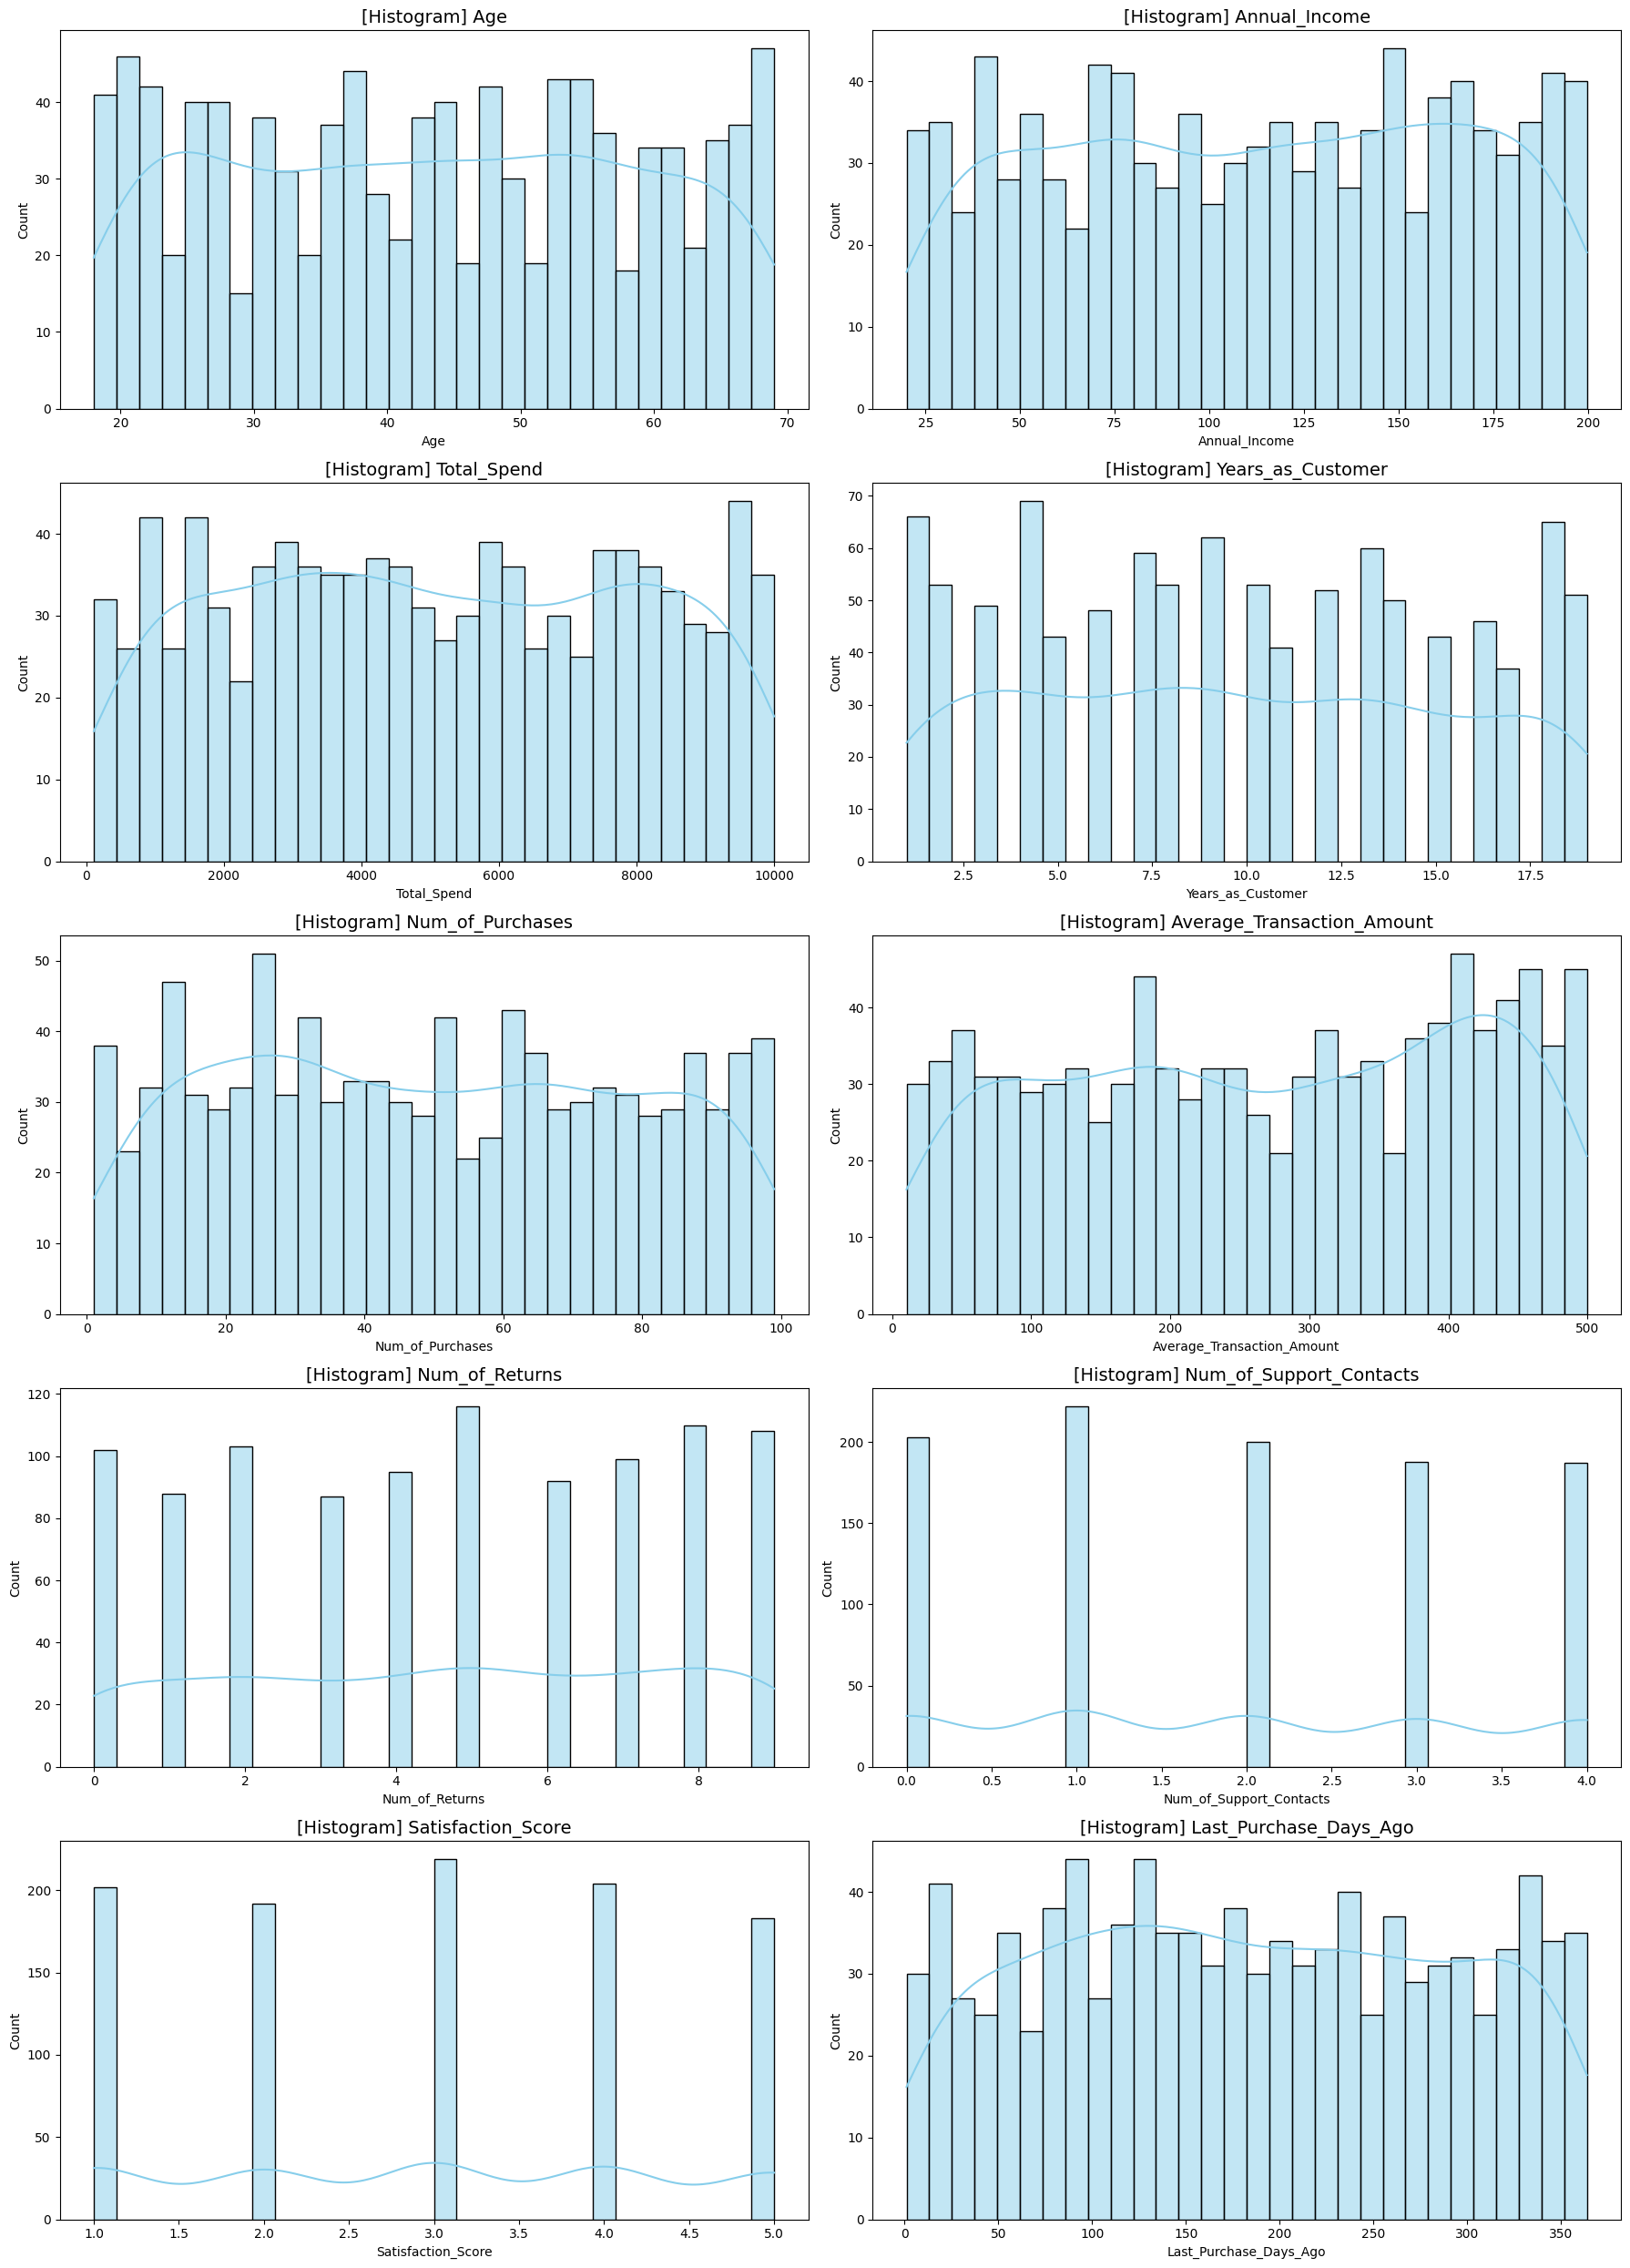

In [12]:
# 수치형 컬럼 목록
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# 히스토그램 출력
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, bins=30, kde=True, color="skyblue")
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


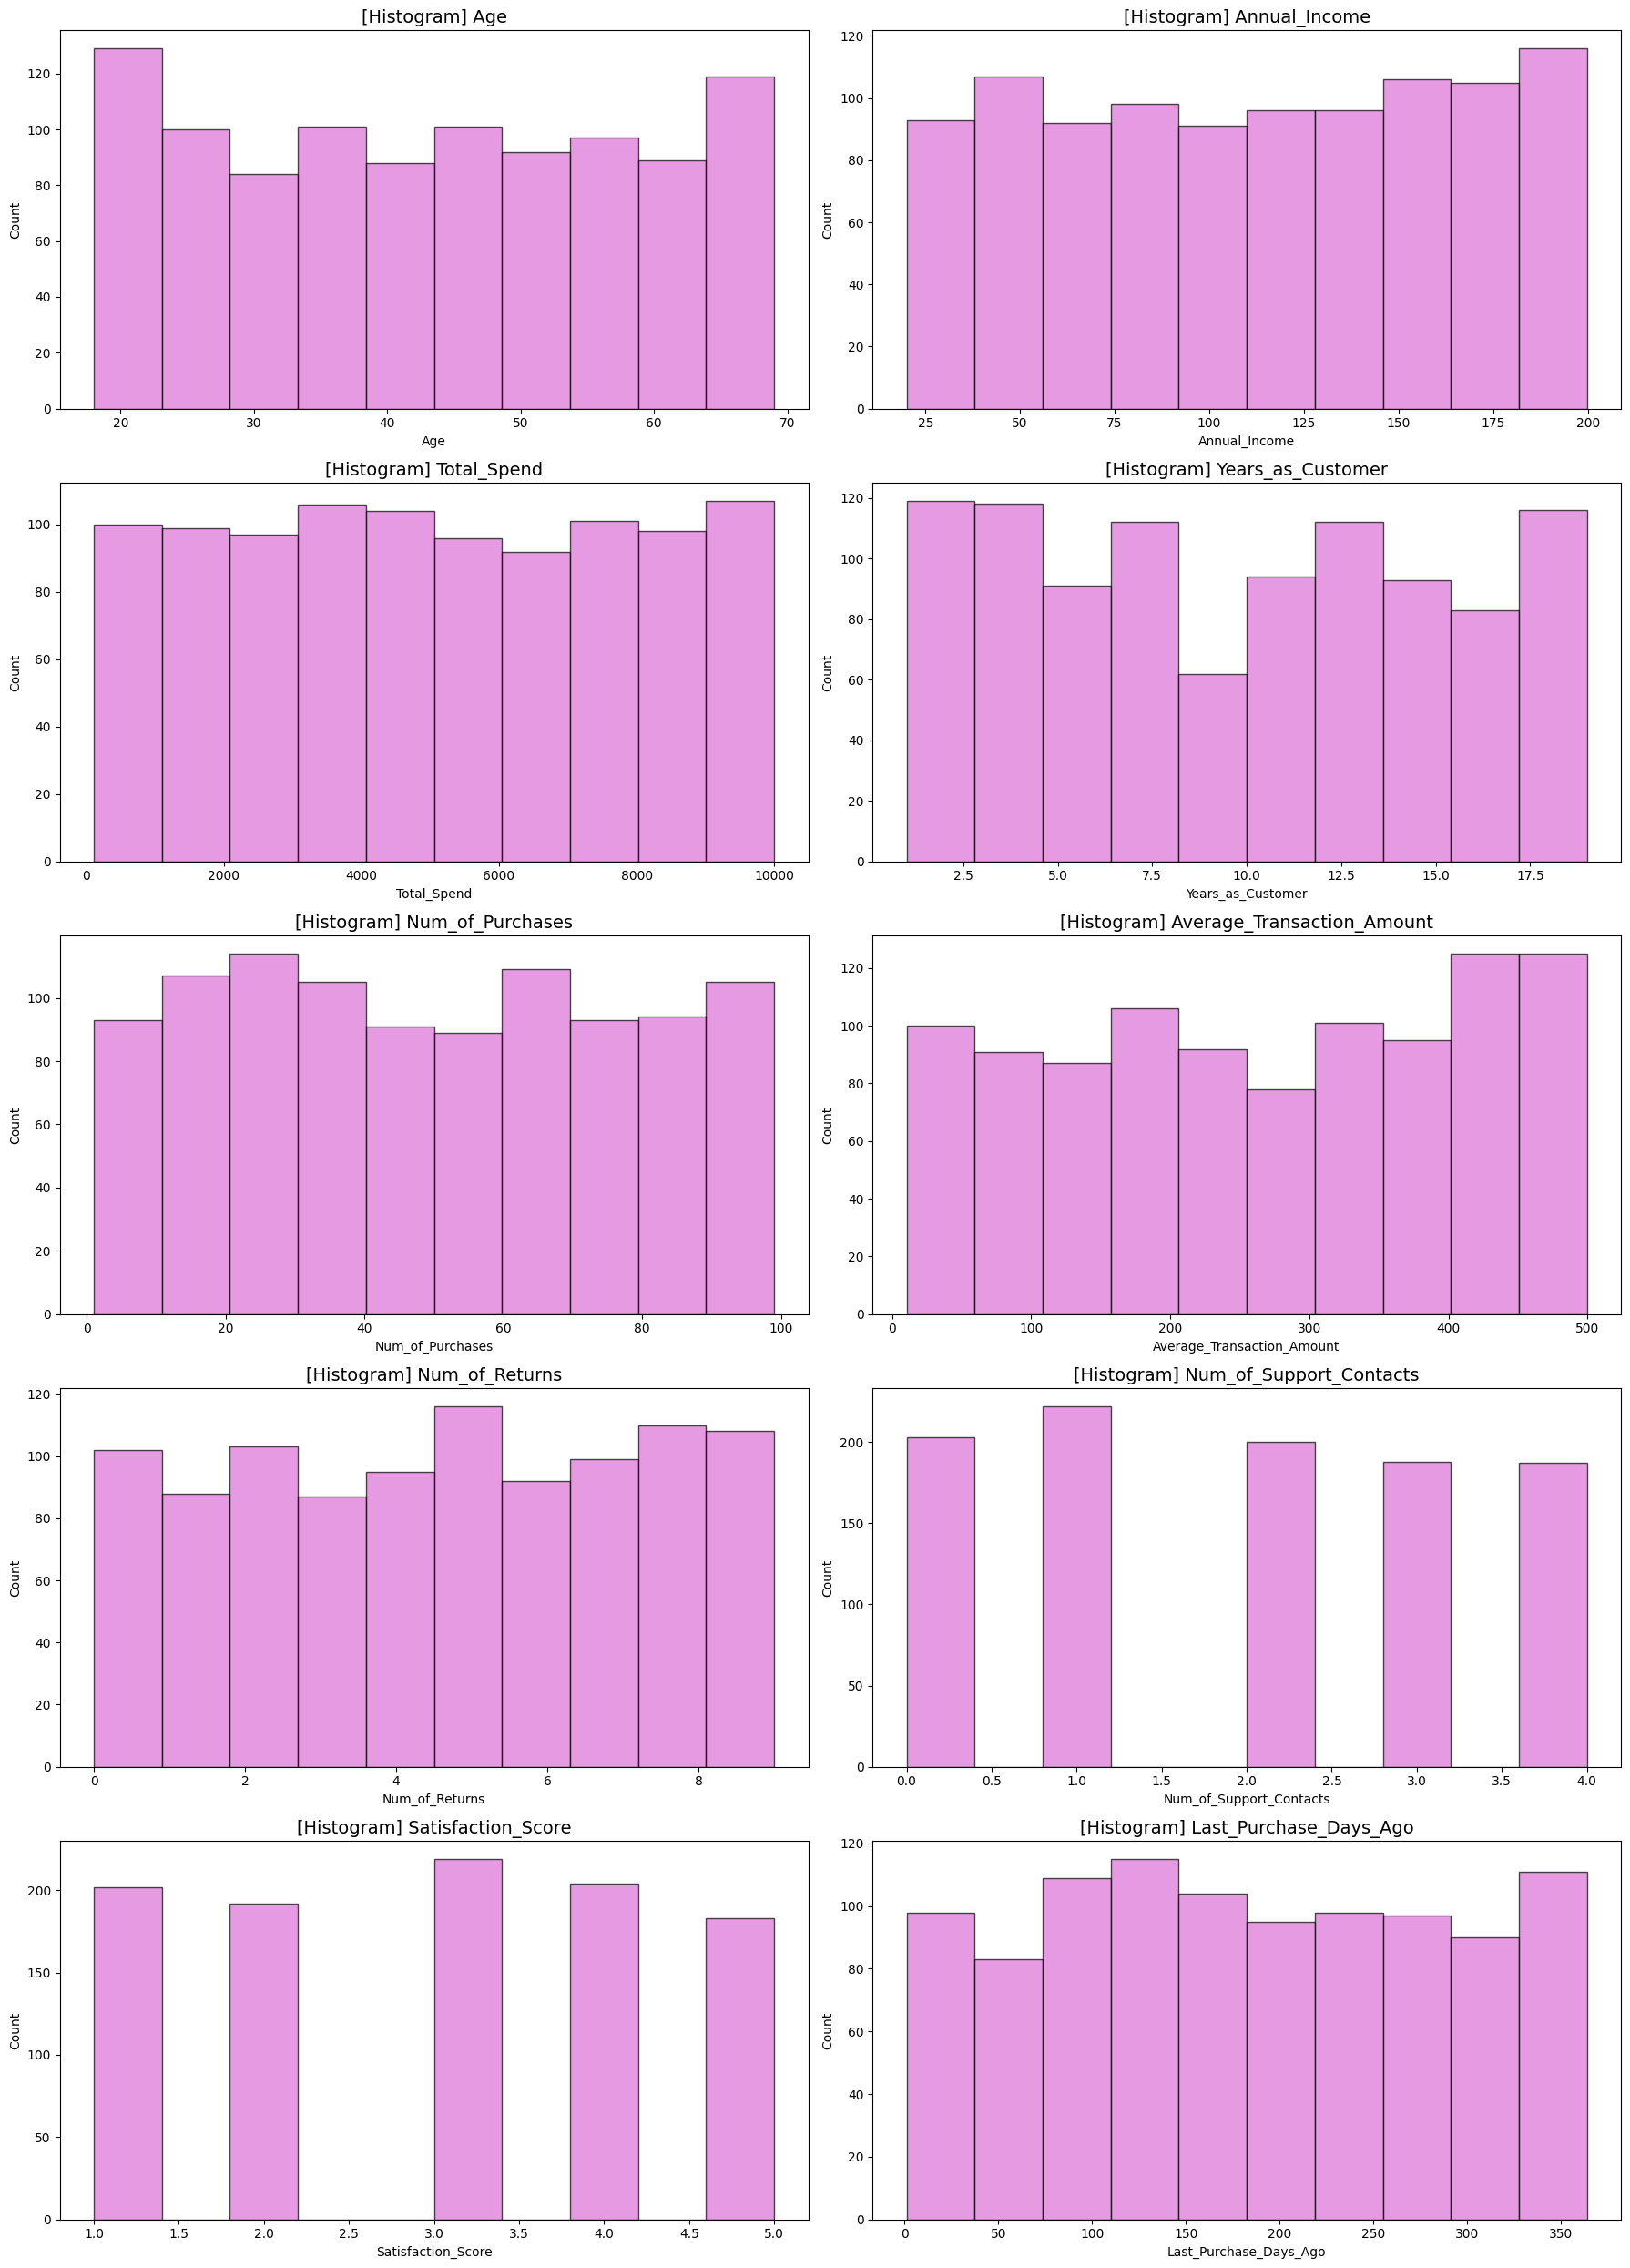

In [13]:
# 수치형 컬럼 목록
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# subplot 설정
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

# 각 컬럼에 대해 히스토그램 그리기
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col],  color="orchid", edgecolor="black", alpha=0.7)
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


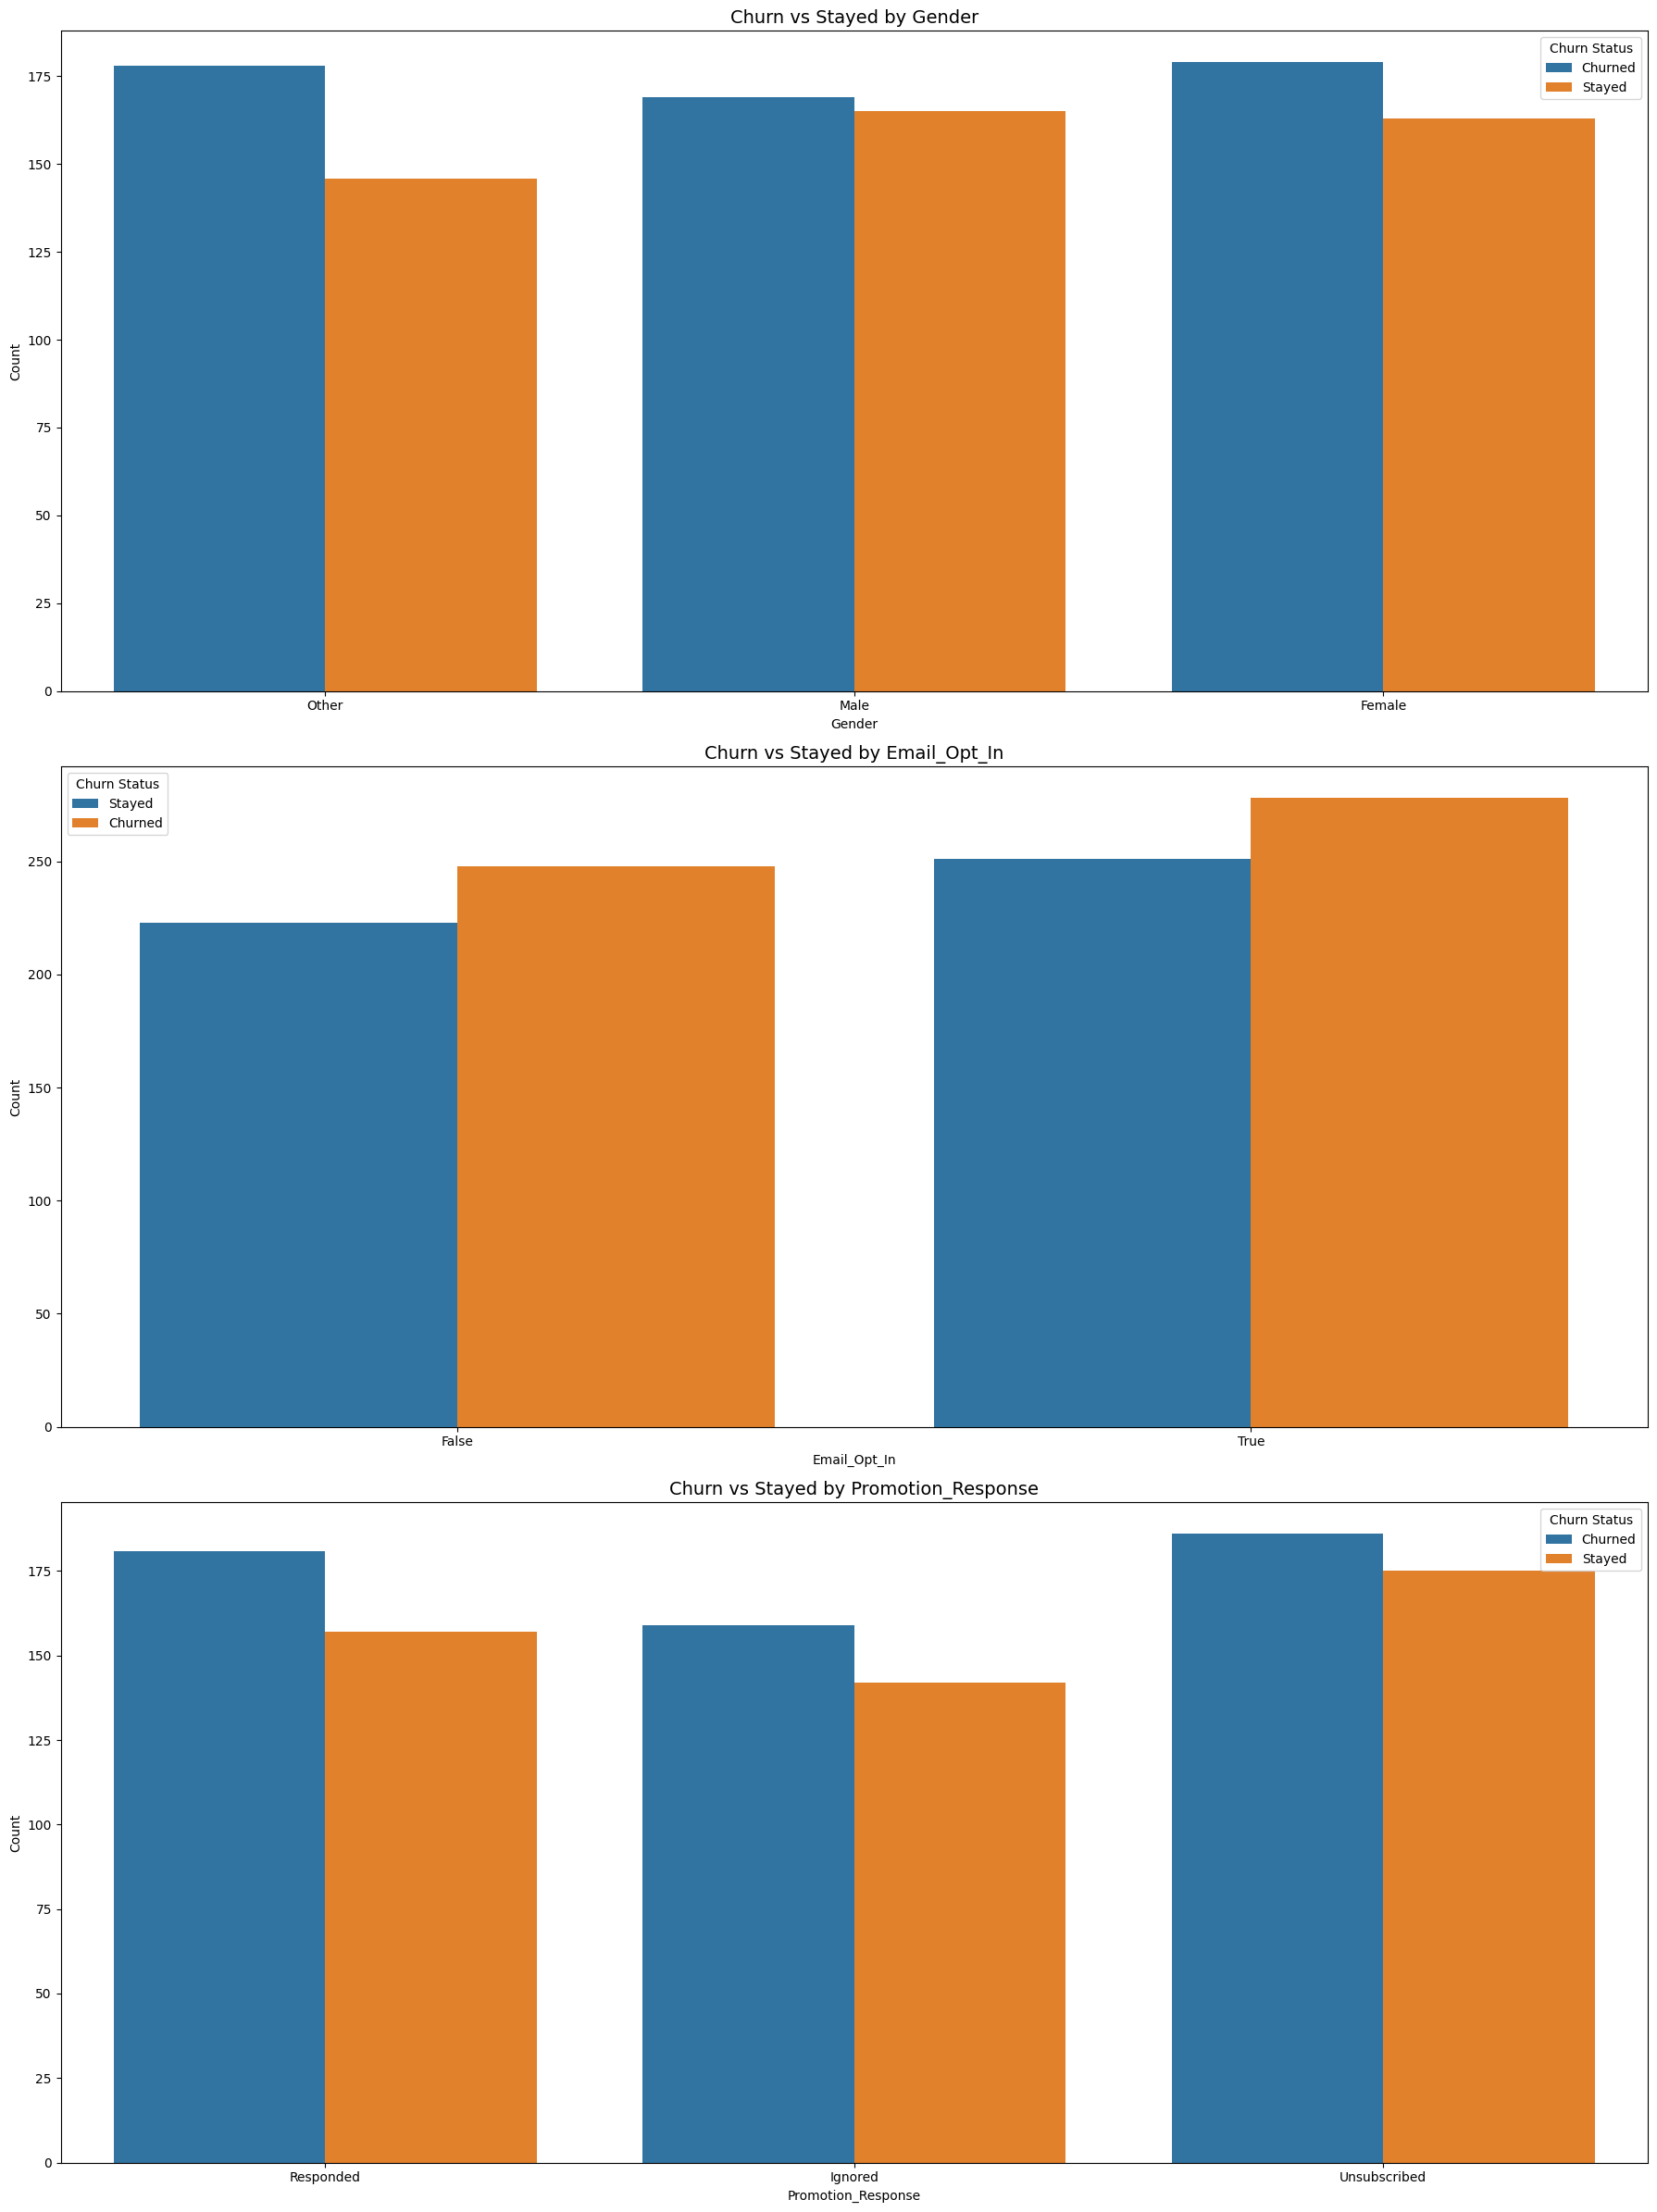

In [14]:
# ✅ 범주형 변수 목록
categorical_cols = ["Gender", "Email_Opt_In", "Promotion_Response"]

# ✅ Target_Churn을 시각화용 문자열로 매핑
df["Churn_Status"] = df["Target_Churn"].map({True: "Churned", False: "Stayed"})

# ✅ 플롯 설정 및 시각화
n_rows = len(categorical_cols)
plt.figure(figsize=(18, 8 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 1, i + 1)
    sns.countplot(data=df, x=col, hue="Churn_Status")
    plt.title(f"Churn vs Stayed by {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


In [15]:
df['Target_Churn'].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

---

# 시나리오2

### **시나리오 2: 소비/구매 패턴 기반 이탈 위험 분석**

> 🛒 "적게 사고 적게 쓰는 고객이 이탈하는가?"
> 
- 변수: `Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`
- 예상 인사이트:
    - 평균 소비가 낮고 거래 빈도가 낮은 고객은 이탈 가능성이 높다
    - 반대로 VIP 고객은 더 오래 유지된다
- 활용: **VIP 보호, 저활동 고객 타겟 프로모션**

---

## 원본 변수
- 변수: `Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`


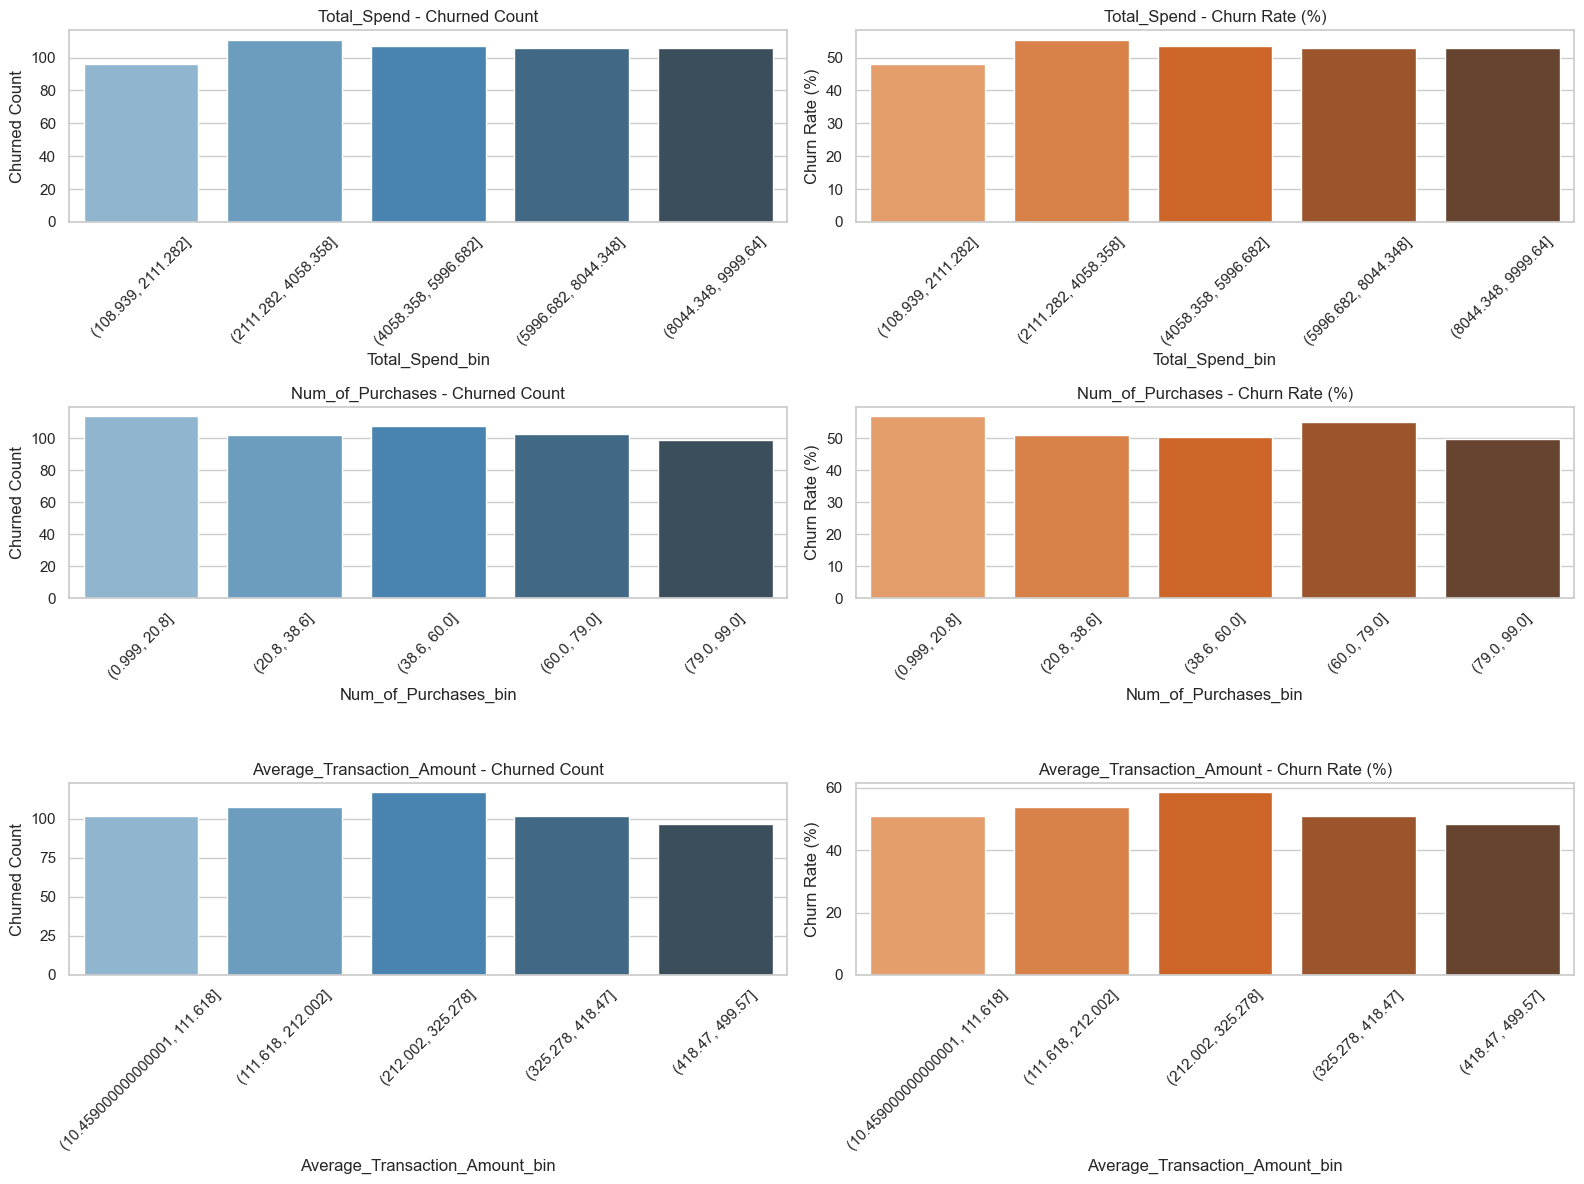

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 2. 분석 대상 변수
original_vars = [
    "Total_Spend",
    "Num_of_Purchases",
    "Average_Transaction_Amount"
]

# ✅ 3. 데이터 타입 확인 (이미 숫자형이면 패스)
for col in original_vars:
    assert pd.api.types.is_numeric_dtype(df[col]), f"{col} is not numeric!"

# 🎯 4. 타겟 이진화
df["Churn_Label"] = df["Target_Churn"].astype(int)

# ✅ 5. 분위수 구간 나누고, 이탈 수 및 이탈률 계산
churn_bin_tables = []

for col in original_vars:
    df[f"{col}_bin"] = pd.qcut(df[col], q=5, duplicates='drop')
    bin_stats = df.groupby(f"{col}_bin")["Churn_Label"].agg(
        Count="count",
        Churned="sum",
        Churn_Rate="mean"
    ).reset_index()
    bin_stats["Churn_Rate (%)"] = bin_stats["Churn_Rate"] * 100
    bin_stats["Variable"] = col
    churn_bin_tables.append(bin_stats)

# 🧾 6. 결과 병합
final_churn_bins = pd.concat(churn_bin_tables, ignore_index=True)

# 📊 7. 이탈 수 & 이탈률 시각화
sns.set(style="whitegrid")
n_vars = len(original_vars)
fig, axes = plt.subplots(n_vars, 2, figsize=(16, n_vars * 4))

for idx, var in enumerate(original_vars):
    data = final_churn_bins[final_churn_bins["Variable"] == var]

    # 이탈 수 그래프
    sns.barplot(x=data[f"{var}_bin"].astype(str), y=data["Churned"], ax=axes[idx, 0], palette="Blues_d")
    axes[idx, 0].set_title(f"{var} - Churned Count")
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].set_ylabel("Churned Count")

    # 이탈률 그래프
    sns.barplot(x=data[f"{var}_bin"].astype(str), y=data["Churn_Rate (%)"], ax=axes[idx, 1], palette="Oranges_d")
    axes[idx, 1].set_title(f"{var} - Churn Rate (%)")
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].set_ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()


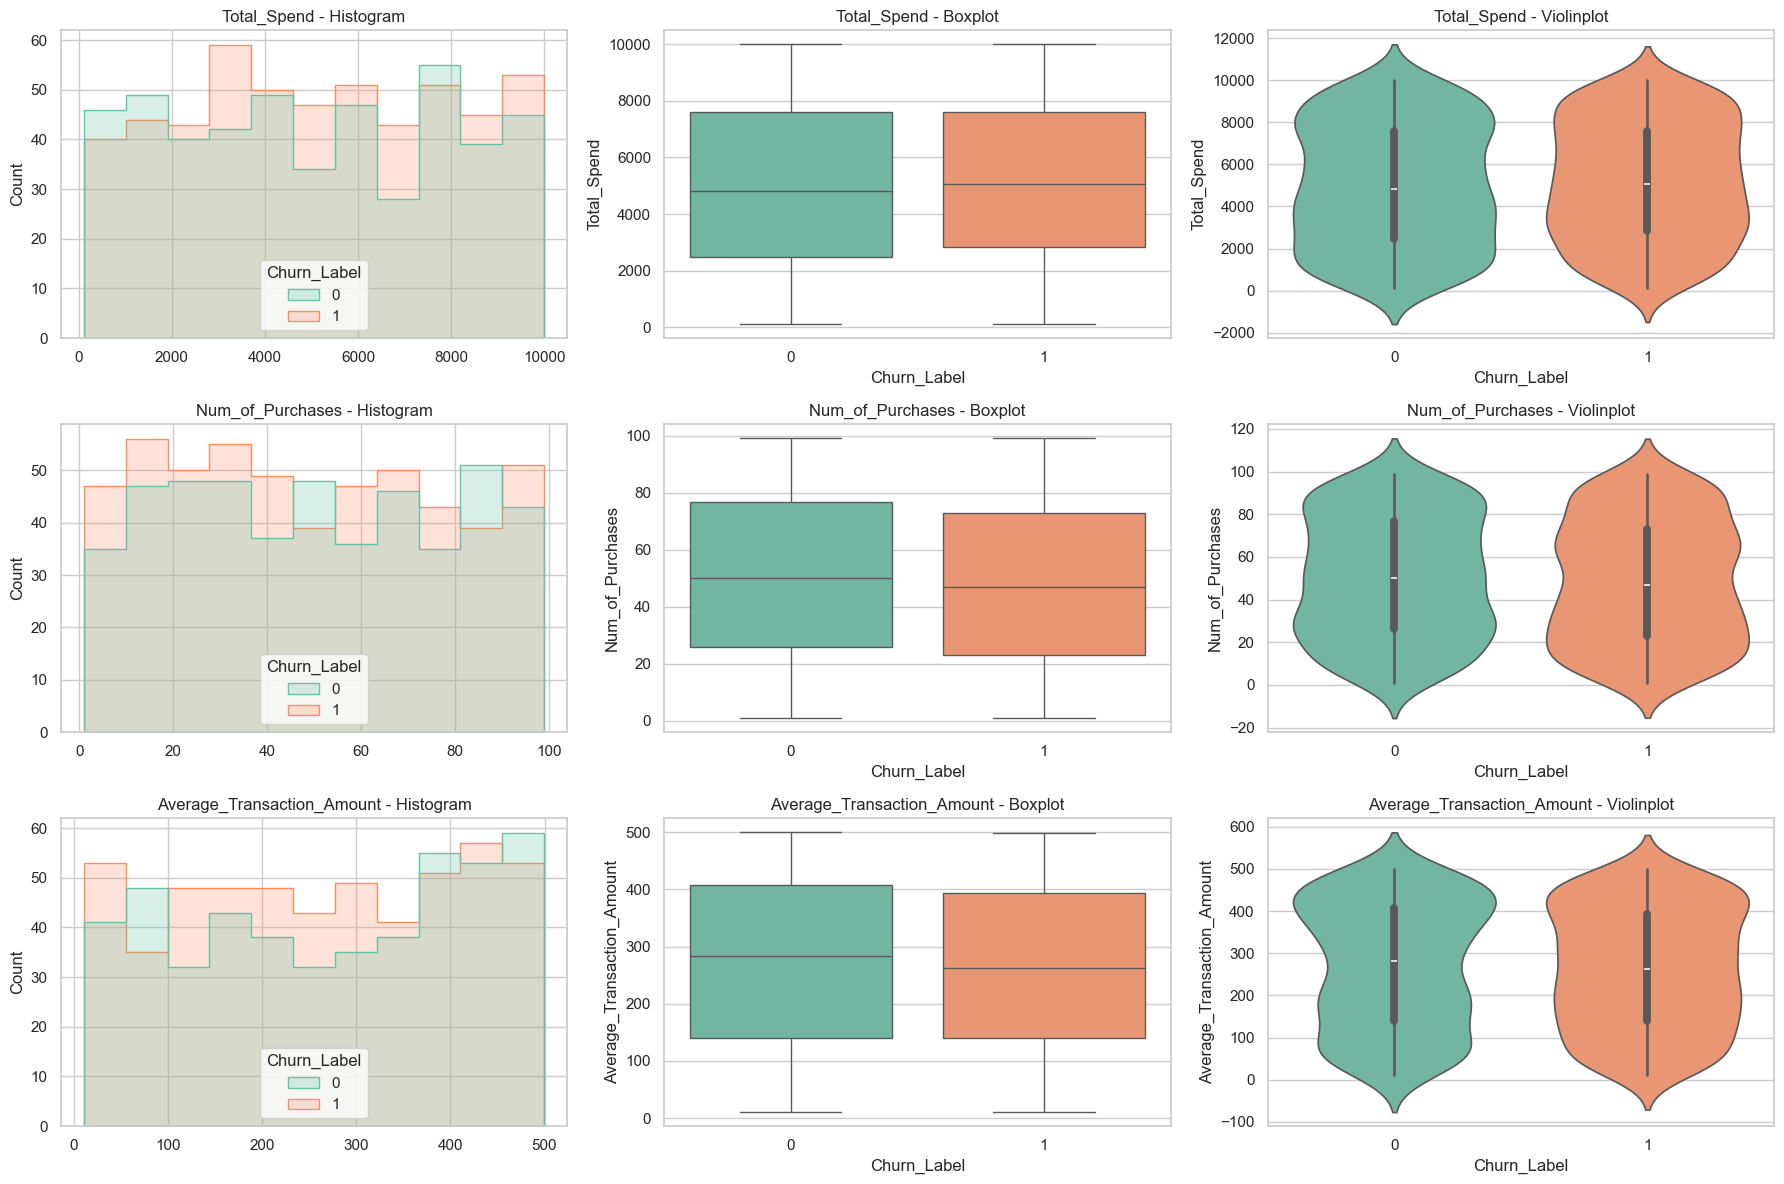

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 2. 분석 대상 변수 정의
original_vars = [
    "Total_Spend",
    "Num_of_Purchases",
    "Average_Transaction_Amount"
]

# ✅ 3. 숫자형으로 안전하게 변환 (문자 제거 없이 직접 형변환)
for col in original_vars:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 🎯 4. 타겟 변수 이진화
df["Churn_Label"] = df["Target_Churn"].astype(int)

# ❌ 5. 결측치 제거 (변환 후 NaN 제거)
df_cleaned = df.dropna(subset=original_vars + ["Churn_Label"])

# 📊 6. 시각화 설정
sns.set(style="whitegrid")
n_rows = len(original_vars)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

# 🔁 7. 변수별 시각화
for i, var in enumerate(original_vars):
    # Histogram
    sns.histplot(data=df_cleaned, x=var, hue="Churn_Label", element="step",
                 common_norm=False, palette="Set2", ax=axes[i, 0])
    axes[i, 0].set_title(f"{var} - Histogram")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Count")

    # Boxplot
    sns.boxplot(data=df_cleaned, x="Churn_Label", y=var, palette="Set2", ax=axes[i, 1])
    axes[i, 1].set_title(f"{var} - Boxplot")
    axes[i, 1].set_xlabel("Churn_Label")

    # Violinplot
    sns.violinplot(data=df_cleaned, x="Churn_Label", y=var, palette="Set2", ax=axes[i, 2])
    axes[i, 2].set_title(f"{var} - Violinplot")
    axes[i, 2].set_xlabel("Churn_Label")

plt.tight_layout()
plt.show()


좋아, 지금까지 우리가 만든 시각화 (구간 기반 + 전체 분포 기반)를 바탕으로  
🔍 **각 변수와 이탈 여부 간의 관계를 분석**하고  
📌 **이탈률, 이탈 수, 전체 분포에서의 인사이트를 상세하게 정리**해줄게.

---

# 📊 원본 변수별 이탈 분석 인사이트 정리

> 대상 변수:  
> ✅ `Total_Spend`  
> ✅ `Num_of_Purchases`  
> ✅ `Average_Transaction_Amount`

---

## 1️⃣ **Total_Spend (총 지출)**

### 📈 구간 기반 분석 (qcut 분위수 분할)
- **중간 구간(약 \$4000~\$7000)의 이탈률이 가장 높음**
- 상위 지출 구간은 이탈률이 조금 낮아지는 경향
- 하위 지출 구간(저소비 고객)은 의외로 이탈률이 낮음

### 📊 이탈 수 기반 분석
- **이탈 고객 수는 중간 지출 구간에 집중됨**
- 이는 해당 구간에 고객이 많이 분포해 있다는 뜻도 내포

### 🧠 전체 분포 기반 인사이트
- `Histogram`: 잔류 고객은 지출이 낮거나 중간에 몰려 있음
- `Box/Violin`: 이탈 고객은 중앙값이 높고, 지출 분포가 더 넓음
- → **많이 쓴다고 무조건 유지되지 않음**  
  → **중간 지출 구간은 리텐션 대상 핵심**

---

## 2️⃣ **Num_of_Purchases (구매 횟수)**

### 📈 구간 기반 분석
- **구매 횟수가 많을수록 이탈률이 눈에 띄게 낮아짐**
- 하위 20~40% 구간에서 이탈률 급등

### 📊 이탈 수 기반 분석
- **구매 횟수가 적은 고객군에서 이탈 수가 집중됨**
- 상위 구매 구간은 이탈 고객 수 자체가 적음

### 🧠 전체 분포 기반 인사이트
- `Boxplot`/`Violinplot`: 이탈 고객은 **구매 횟수 분포가 좁고 중앙값 낮음**
- 잔류 고객은 넓은 분포와 더 높은 중앙값
- → **구매 빈도는 가장 강력한 리텐션 예측 요인 중 하나**  
- → 고객 충성도와 직접적으로 연결되는 행동 변수

---

## 3️⃣ **Average_Transaction_Amount (평균 거래 금액)**

### 📈 구간 기반 분석
- 이탈률은 구간마다 **뚜렷한 추세 없이 완만한 곡선**
- **중간 단가 구간에서 다소 높은 이탈률**

### 📊 이탈 수 기반 분석
- 이탈 수는 **중간~고액 단가 고객에서 다수 발생**
- 고액 단가 고객은 수는 적지만 이탈할 경우 손해가 큼

### 🧠 전체 분포 기반 인사이트
- `Histogram`: 이탈 고객은 단가가 높은 쪽에도 분포함
- `Box/Violin`: 중앙값에는 큰 차이 없음, 다만 분산은 잔류 고객이 더 큼
- → **단가보다 구매 빈도(Num_of_Purchases)가 더 결정적인 변수**

---

# 🔍 종합 해석

| 변수명 | 이탈률 특징 | 이탈 수 분포 | 분포 분석 해석 | 실무 인사이트 |
|--------|-------------|----------------|----------------|----------------|
| **Total_Spend** | 중간 지출 구간에서 가장 높음 | 이탈 고객 수 집중 | 이탈 고객이 더 넓은 지출 분포 | **중간 지출자 관리 필요** |
| **Num_of_Purchases** | 구매 많을수록 이탈률↓ | 하위 구간에 이탈 집중 | 이탈 고객의 구매 횟수 낮음 | **구매 빈도 = 핵심 예측 변수** |
| **Avg_Transaction_Amount** | 큰 차이 없음 | 중고액 구간에 몰림 | 차이는 약하지만 분포 폭 차이 | **단가보단 횟수 중심 전략 유효** |

---

# 🧠 실무적 전략 제안

| 고객군 조건 | 제안 전략 |
|-------------|------------|
| **중간 지출 & 구매 적음** | 🔸 리마인드 캠페인, 체험권 제공 |
| **구매 잦고 평균 단가 낮음** | ✅ VIP 등급 부여, 추천 리워드 |
| **고단가 단발 고객** | 🔺 프리미엄 유지 전략 강화 |
| **하위 구매 구간 & 이탈 위험군** | 📢 신규 고객 온보딩 강화, 만족도 조사 유도 |

---

이제 이 흐름으로  
- 📋 Markdown 보고서용 정리  
- 📈 파생 변수 버전 분석  
- 🎯 고객 세그먼트 정의/전략 설계  

중 어디로 이어갈까?

좋아, 그럼 지금까지 분석한 **원본 변수 3개 (`Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`)**에 대해  
각각을 기준으로:

> 🔍 **이탈 수 기반 vs 이탈률 기반 분석**  
> 🔮 **예상 인사이트 vs 실제 결과**  
> 💡 **핵심 해석**  

을 **변수별로 나눠 정리**해줄게.

---

# 📊 변수별: 이탈 수 vs 이탈률 분석 비교표

## 1️⃣ `Total_Spend` (총 지출)

| 분석 기준 | 🔮 예상 인사이트 | ✅ 실제 결과 | 💡 해석 |
|------------|------------------|----------------|---------|
| **이탈 수 (Churned Count)** | 고지출 고객이 이탈하면 손해가 크므로 이탈 수가 많을 것이다. | ❌ 이탈 수는 **중간 지출 구간에 집중**됨 | 고객 수가 많은 **중간 소비층**에서 이탈이 많아 보임 |
| **이탈률 (Churn Rate)** | 고지출 고객은 만족도가 높고 이탈률이 낮을 것이다. | 🔄 이탈률은 **중간 지출 구간에서 가장 높음**<br>고지출 구간은 오히려 낮음 | **많이 쓴다고 잔류하는 건 아님**. 중간 지출자 관리 필요 |

---

## 2️⃣ `Num_of_Purchases` (구매 횟수)

| 분석 기준 | 🔮 예상 인사이트 | ✅ 실제 결과 | 💡 해석 |
|------------|------------------|----------------|---------|
| **이탈 수 (Churned Count)** | 구매를 많이 한 고객이 많으므로 이탈 수가 많을 것 | ❌ 이탈 수는 **하위 구매 구간**에 집중됨 | **구매 적은 고객 수가 많았고**, 그 중 다수가 이탈 |
| **이탈률 (Churn Rate)** | 구매 많이 한 고객은 충성도가 높아 이탈률이 낮을 것이다 | ✅ **구매 적은 고객일수록 이탈률 급등**<br>상위 구간은 거의 이탈 없음 | **구매 횟수는 강력한 리텐션 지표**. 신규/저빈도 고객은 고위험군 |

---

## 3️⃣ `Average_Transaction_Amount` (평균 구매 금액)

| 분석 기준 | 🔮 예상 인사이트 | ✅ 실제 결과 | 💡 해석 |
|------------|------------------|----------------|---------|
| **이탈 수 (Churned Count)** | 고단가 소비자 이탈 시 손해 크므로 수가 많을 것이다 | 🔄 이탈 수는 **중간~고단가 구간에 다수 존재** | 이탈 수는 고객 분포 영향 큼. 단가 높다고 무조건 이탈 많은 건 아님 |
| **이탈률 (Churn Rate)** | 고단가 고객이 더 만족하고 이탈률 낮을 것이다 | 🔄 이탈률은 전체적으로 **큰 차이 없음** | **단가보단 구매 빈도**가 훨씬 영향력 있음. 예측력 약한 변수 |

---

# 🧠 종합 인사이트 요약

| 변수 | 이탈 수로 보면 | 이탈률로 보면 | 핵심 인사이트 |
|-------|------------------|----------------|----------------|
| **Total_Spend** | 중간 구간에 이탈 집중 | 중간 구간 이탈률 가장 높음 | **중간 지출자 리스크 관리 필요** |
| **Num_of_Purchases** | 하위 구간에 이탈 수 집중 | 하위 구간 이탈률 급등 | **빈도 낮은 고객 = 고위험군** |
| **Avg_Transaction_Amount** | 중간~고단가에서 이탈 다수 | 전체적으로 큰 차이 없음 | **단가보다는 횟수가 더 중요** |

---

## ✅ 전략 요약

| 고객군 조건 | 추천 전략 |
|--------------|--------------|
| 중간 지출 & 낮은 구매 빈도 | 🔸 리마인드 메시지, 프로모션 유도 |
| 고지출 & 고빈도 고객 | ✅ VIP 유지 프로그램 |
| 저지출 & 반복 구매 | 💎 충성 등급 강화, 추천 이벤트 |
| 고단가 단발 고객 | ⚠ 케어 강화, CS 품질 개선 |

---

필요하다면 이 내용을  
- 📄 Markdown 문서로 변환  
- 📊 발표용 테이블 or 슬라이드 구성  
- 🔁 파생 변수로 같은 구조로 정리  

해줄 수도 있어.  
어떻게 이어가볼까? 😎